In [1]:
#
# Import Libraries
#

from dotmap import DotMap
import numpy as np
import os
import pandas as pd
import sys

#from sklearn.decomposition import FactorAnalysis
#from factor_analyzer import FactorAnalyzer

from mofapy2.run.entry_point import entry_point
import mofax as mfx

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.dpi'] = 200

from plotly import graph_objects as go
from plotly.subplots import make_subplots

utilsPath = r'S:\U_Proteomica\UNIDAD\software\MacrosRafa\data\Metabolomics\PESA_Integromics\Data\utils'
if utilsPath not in sys.path:
    sys.path.append(utilsPath)

In [2]:
#
# Set constants
#

Qworking_path = r"S:\U_Proteomica\UNIDAD\software\MacrosRafa\data\Metabolomics\PESA_Integromics\Data\Proteomics\AWHS"
Mworking_path = r"S:\U_Proteomica\UNIDAD\software\MacrosRafa\data\Metabolomics\PESA_Integromics\Data\Metabolomics\AWHS"

# X
xq_path = os.path.join(Qworking_path, "WorkingFiles", "Xq_minus_X_norm.tsv")
mq_path = os.path.join(Mworking_path, "WorkingFiles", "Xm_norm_MS2.tsv")

# Feature info
q2i_path = os.path.join(Qworking_path, "WorkingFiles", "q2info.tsv")
m2i_path = os.path.join(Mworking_path, "WorkingFiles", "m2info.tsv")

# metadata
mdata_path = os.path.join(r"S:\U_Proteomica\UNIDAD\software\MacrosRafa\data\Metabolomics\PESA_Integromics\Data\Metadata\AWHS\WorkingFiles\main_metadata.tsv")

# RPath
rPath = r"S:\U_Proteomica\UNIDAD\software\MacrosRafa\data\Metabolomics\PESA_Integromics\Data\Analysis\02-Correlations\AWHS\myRData"

In [3]:
#
# Read data
#

xq = pd.read_csv(xq_path, sep='\t', index_col=0)
xm = pd.read_csv(mq_path, sep='\t', index_col=0)

q2i = pd.read_csv(q2i_path, sep='\t')
m2i = pd.read_csv(m2i_path, sep='\t')

mdata = pd.read_csv(mdata_path, sep='\t', index_col=0)

In [4]:
tmp = m2i.set_index('fid').loc[xm.columns]['NAME']
xm.columns = [f"{i} | {j}" for i,j in zip(tmp.index, tmp.values)]

In [5]:
# Intersect q-omics and m-omics

seqn = np.intersect1d(
    xq.index,
    xm.index
)

xqi = xq.loc[seqn].copy()
xmi = xm.loc[seqn].copy()
mdatai = mdata.loc[seqn]

In [24]:
# Create data matrix object (without separating by groups)

# data_mat = [
#     [
#     xqi.loc[mdatai[mdatai['Group']=='C'].index].to_numpy(),
#     xqi.loc[mdatai[mdatai['Group']=='D'].index].to_numpy()
#     ],
#     [
#     xmi.loc[mdatai[mdatai['Group']=='C'].index].to_numpy(),
#     xmi.loc[mdatai[mdatai['Group']=='D'].index].to_numpy()
#     ]
# ]

data_mat = [
    [
    xqi.to_numpy(),
    ],
    [
    xmi.to_numpy(),
    ]
]

ent = entry_point()
ent.set_data_options(scale_groups=False, scale_views=False, center_groups=False)

ent.set_data_matrix(
    data_mat, 
    views_names=['q', 'm'], 
    #groups_names=['C', 'D'],
    features_names=[xqi.columns, xmi.columns],
    # samples_names=[
    #     [str(i) for i in mdatai[mdatai['Group']=='C'].index], 
    #     [str(i) for i in mdatai[mdatai['Group']=='D'].index]
    # ],
    samples_names=[[str(i) for i in seqn]],
    likelihoods=['gaussian', 'gaussian']
)

ent.set_model_options(
    factors = 25, 
    spikeslab_weights = True, 
    spikeslab_factors=False,
    ard_weights = True,
    ard_factors=True
)

ent.set_train_options(
    convergence_mode = "slow", 
    iter=10000,
    dropR2 = 0.015, 
    gpu_mode = False, 
    seed = 1,
)


        #########################################################
        ###           __  __  ____  ______                    ### 
        ###          |  \/  |/ __ \|  ____/\    _             ### 
        ###          | \  / | |  | | |__ /  \ _| |_           ### 
        ###          | |\/| | |  | |  __/ /\ \_   _|          ###
        ###          | |  | | |__| | | / ____ \|_|            ###
        ###          |_|  |_|\____/|_|/_/    \_\              ###
        ###                                                   ### 
        ######################################################### 
       
 
        
Groups names not provided, using default naming convention:
- group1, group2, ..., groupG

Successfully loaded view='q' group='group0' with N=312 samples and D=381 features...
Successfully loaded view='m' group='group0' with N=312 samples and D=656 features...


Model options:
- Automatic Relevance Determination prior on the factors: True
- Automatic Relevance Determination prio

In [25]:
m.close()
del m

In [26]:
ent.build()

ent.run()

# Save the output
ent.save(outfile=r'./modelpy.hdf5')



######################################
## Training the model with seed 1 ##
######################################


ELBO before training: -5117017.12 

Iteration 1: time=0.28, ELBO=-434604.08, deltaELBO=4682413.040 (91.50669094%), Factors=24
Iteration 2: time=0.32, ELBO=-378156.77, deltaELBO=56447.309 (1.10312918%), Factors=23
Iteration 3: time=0.30, ELBO=-364092.35, deltaELBO=14064.421 (0.27485586%), Factors=22
Iteration 4: time=0.30, ELBO=-341498.02, deltaELBO=22594.327 (0.44155270%), Factors=21
Iteration 5: time=0.27, ELBO=-327993.36, deltaELBO=13504.658 (0.26391661%), Factors=20
Iteration 6: time=0.24, ELBO=-323818.22, deltaELBO=4175.144 (0.08159331%), Factors=19
Iteration 7: time=0.21, ELBO=-317567.96, deltaELBO=6250.263 (0.12214661%), Factors=18
Iteration 8: time=0.22, ELBO=-312751.26, deltaELBO=4816.695 (0.09413092%), Factors=17
Iteration 9: time=0.18, ELBO=-309950.34, deltaELBO=2800.924 (0.05473743%), Factors=16
Iteration 10: time=0.20, ELBO=-386727.73, deltaELBO=-76777.396 

In [27]:
m = mfx.mofa_model('modelpy.hdf5')

In [28]:
print(f"""\
Observations: {m.shape[0]}
Features: {m.shape[1]}
Groups of observations: {', '.join(m.groups)}
Views: {', '.join(m.views)}
""")

Observations: 312
Features: 1037
Groups of observations: group0
Views: q, m



In [29]:
# Get weights from the model

wq = m.get_weights(df=True).loc[xqi.columns]
wm = m.get_weights(df=True).loc[xmi.columns]

In [30]:
palette = ['#636EFA', '#EF553B']

In [31]:
# Variance explained by factors

explVar = pd.pivot_table(m.get_variance_explained(), values='R2', index='Factor', columns='View')
explVar

View,m,q
Factor,,
Factor1,31.682004,1.081997
Factor2,7.062885,0.630928
Factor3,6.645778,0.173249
Factor4,5.004846,0.526826
Factor5,2.209049,0.059762
Factor6,2.241553,0.006387
Factor7,1.882586,0.196756
Factor8,1.960098,0.056130


In [32]:
plotWD = {}

for n,col in enumerate(wq.columns):

    fig = make_subplots(rows=1, cols=2, subplot_titles=[f'q | {round(explVar.loc[col]["q"],4)}%', f'm | {round(explVar.loc[col]["m"],4)}%'])
    
    fig.add_trace(go.Scatter(
        y=np.arange(wq.shape[0])/wq.shape[0],
        x=sorted(wq[col].to_numpy()),
        mode='markers',
        marker_size=3,
        marker_color=palette[0],
        showlegend=False
    ), row=1, col=1)

    fig.add_trace(go.Scatter(
        y=np.arange(wm.shape[0])/wm.shape[0],
        x=sorted(wm[col].to_numpy()),
        mode='markers',
        marker_size=3,
        marker_color=palette[1],
        showlegend=False
    ), row=1, col=2)


    fig.update_xaxes(range=[-1,1])
    fig.update_layout(height=400, title=f"{col}")

    plotWD[col]=fig
    #fig.show()

FACTOR EXPLORATION

In [185]:
top = 15
col = 'Factor2'

fig = make_subplots(rows=1, cols=2, subplot_titles=[f'q | {round(explVar.loc[col]["q"],4)}%', f'm | {round(explVar.loc[col]["m"],4)}%'])
fig.add_trace(go.Scatter(
    y=np.arange(wq.shape[0])/wq.shape[0],
    x=sorted(wq[col].to_numpy()),
    mode='markers',
    marker_size=3,
    marker_color=top*['black'] + (wq.shape[0]-2*top)*[palette[0]] + top*['black'],
    showlegend=False
), row=1, col=1)

fig.add_trace(go.Scatter(
    y=np.arange(wm.shape[0])/wm.shape[0],
    x=sorted(wm[col].to_numpy()),
    mode='markers',
    marker_size=3,
    marker_color=top*['black'] + (wm.shape[0]-2*top)*[palette[1]] + top*['black'],
    showlegend=False
), row=1, col=2)

fig.update_xaxes(range=(-1,1), title='Weight')
fig.show()

w_all = {}
for df, omic, xi in [(wq, 'q', xqi), (wm, 'm', xmi)]:
    fig = make_subplots(rows=1, cols=2, subplot_titles=['Negative', 'Positive'], horizontal_spacing=0.15)

    tmp = df.sort_values(col, ascending=False)[col]
    w_all[omic] = tmp
    topup = tmp[:top]
    topdo = tmp[-top:]

    fig.add_trace(go.Bar(
        y=topup.index[::-1],
        x=topup.values[::-1],
        orientation='h',
        width=0.1, showlegend=False
    ), row=1, col=2)

    fig.add_trace(go.Bar(
        y=topdo.index,
        x=topdo.values,
        orientation='h',
        width=0.1, showlegend=False
    ), row=1, col=1)
    fig.update_xaxes(range=(-1,1), title='Weight')
    fig.update_layout(height=400+15*top, title=omic)
    fig.show()

    #sns.clustermap(xi.loc[:, topup.index.tolist()+topdo.index.tolist()].T, cmap='vlag', figsize=(12,6), center=0, vmin=-3, vmax=3)

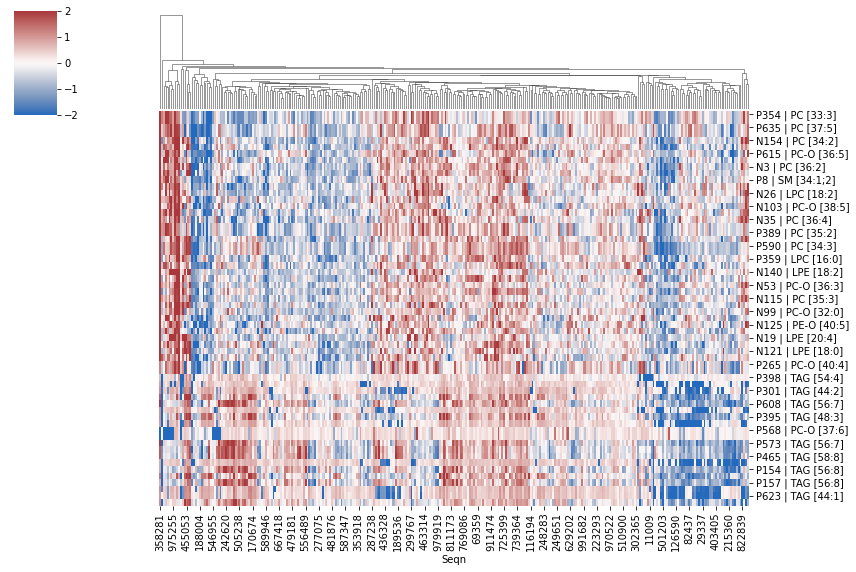

In [225]:
# HEATMAP

prots = ['P27169','P80108','P02647','P02652']
tmp = xqi.loc[
    :, 
    w_all['q'][:0].index.tolist()+w_all['q'][:0].index.tolist()
    ].join(

xmi.loc[
    :, 
    w_all['m'][:40].index.tolist()+w_all['m'][-20:].index.tolist()
    ]
).T

sns.clustermap(
    tmp,
    cmap='vlag', figsize=(12,8), center=0, row_cluster=False, col_cluster=True, vmin=-2, vmax=2)

STRING FUNCTIONS

In [197]:
from STRING import Uniprot2String, FunctionalEnrichment

In [226]:
background = Uniprot2String(
    q2i['fid'].tolist()
)

background = [i[1] for i in background]

In [227]:
my_genes = Uniprot2String(
    w_all['q'].index.tolist()[:15]+w_all['q'].index.tolist()[-15:]
)
my_genes = [i[1] for i in my_genes]

In [228]:
data = FunctionalEnrichment(my_genes, background, species=9606)

from io import StringIO

data = pd.read_csv(
    StringIO(data),
    sep='\t'
)

In [229]:
col = ['category', 'number_of_genes', 'number_of_genes_in_background', 'fdr', 'description']
categories = ['Process', 'KEGG', 'Component']
data[np.isin(data['category'], categories)].sort_values('fdr').loc[:, col].head(15)

,category,number_of_genes,number_of_genes_in_background,fdr,description
36,Component,9,86,0.000009,Blood microparticle
35,Component,19,769,0.000009,Extracellular space
11,Process,6,12,0.000017,"Complement activation, alternative pathway"
37,Component,16,578,0.000044,Extracellular vesicle
79,KEGG,7,60,0.000088,Complement and coagulation cascades
38,Component,15,574,0.000250,Extracellular exosome
39,Component,5,27,0.000560,Plasma lipoprotein particle
80,KEGG,3,6,0.003100,Fat digestion and absorption
81,KEGG,3,5,0.003100,Vitamin digestion and absorption
82,KEGG,4,22,0.003100,Cholesterol metabolism


In [97]:
def PlotNetwork(identifiers, species=9606):

    ################################################################
    ## For each protein in a list save the PNG image of
    ## STRING network of its 15 most confident interaction partners.
    ##
    ## Requires requests module:
    ## type "python -m pip install requests" in command line (win)
    ## or terminal (mac/linux) to install the module
    ################################################################

    import requests ## python -m pip install requests
    from time import sleep
    

    string_api_url = "https://version-11-5.string-db.org/api"
    output_format = "image"
    method = "network"

    my_genes = ["YMR055C", "YFR028C",
                "YNL161W", "YOR373W",
                "YFL009W", "YBR202W"]


    ##
    ## Construct URL
    ##


    request_url = "/".join([string_api_url, output_format, method])

    ## For each gene call STRING

    #for gene in my_genes:

    ##
    ## Set parameters
    ##

    params = {

        "identifiers" : "\r".join(identifiers), # your protein
        "species" : species, # species NCBI identifier 
        "add_white_nodes": 0, # add 15 white nodes to my protein 
        "network_flavor": "confidence", # show confidence links
        "caller_identity" : "www.awesome_app.org" # your app name

    }


    ##
    ## Call STRING
    ##

    response = requests.post(request_url, data=params)
    return response.content

    ##
    ## Save the network to file
    ##

    #file_name = "%s_network.png" % gene
    #print("Saving interaction network to %s" % file_name)

    #with open(file_name, 'wb') as fh:
    #    fh.write(response.content)

    #sleep(1)

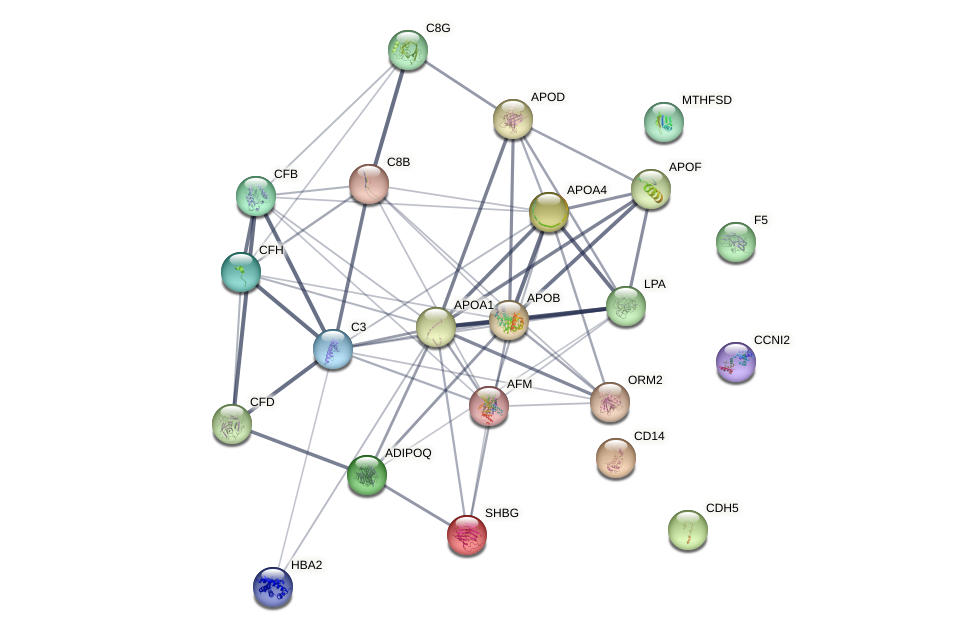

In [231]:
from IPython.display import Image

Image(PlotNetwork(my_genes))